LeNet5 architecture

(Using tanh, avg pool, no Gaussian connections, and complete C3 connections)

In [8]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = "cpu"

'''
Step 1:
'''

# MNIST dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False, 
                              transform=transforms.ToTensor())


'''
Step 2: LeNet5
'''
class LeNet(nn.Module) :
    
    def __init__(self) :
        super(LeNet, self).__init__()
        
        #padding=2 makes 28x28 image into 32x32
        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(1, 6, kernel_size=5, padding=2),
                nn.Tanh()
                )
        self.pool_layer1 = nn.Sequential(
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Tanh()
                )
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(6, 16, kernel_size=5),
                nn.Tanh()
                )
        self.pool_layer2 = nn.Sequential(
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Tanh()
                )
#         self.conv_layer3 = nn.Sequential(
#                 nn.Conv2d(16, 120, kernel_size=5),
#                 nn.Tanh()
#                 )
        self.C5_layer = nn.Sequential(
                nn.Linear(5*5*16, 120),
                nn.Tanh()
                )
        self.fc_layer1 = nn.Sequential(
                nn.Linear(120, 84),
                nn.Tanh()
                )
        self.fc_layer2 = nn.Linear(84, 10)
        
        
    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.pool_layer1(output)
        output = self.conv_layer2(output)
        output = self.pool_layer2(output)
#         output = self.conv_layer3(output)
#         output = output.view(-1, 120)
        output = output.view(-1,5*5*16)
        output = self.C5_layer(output)
        output = self.fc_layer1(output)
        output = self.fc_layer2(output)
        return output

    
'''
Step 3
'''
model = LeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)  # lr hand-tuned

'''
Step 4
'''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1024, shuffle=True)

import time
start = time.time()
for epoch in range(10) :
    print(f"{epoch}th epoch starting.")
    for images, labels in train_loader :
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1024, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    
    total += labels.size(0)
            
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

0th epoch starting.
1th epoch starting.
2th epoch starting.
3th epoch starting.
4th epoch starting.
5th epoch starting.
6th epoch starting.
7th epoch starting.
8th epoch starting.
9th epoch starting.
Time ellapsed in training is: 55.27556610107422
[Test set] Average loss: 0.0002, Accuracy: 9307/10000 (93.07%)



Modern variant of LeNet5

(Using ReLU, max pool, no Gaussian connections, and complete C3 connections)

In [9]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

# MNIST dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False, 
                              transform=transforms.ToTensor())

'''
Step 2
'''
class LeNet(nn.Module) :
    
    def __init__(self) :
        super(LeNet, self).__init__()
        
        #padding=2 makes 28x28 image into 32x32
        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(1, 6, kernel_size=5, padding=2),
                nn.ReLU()
                )
        self.pool_layer1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(6, 16, kernel_size=5),
                nn.ReLU()
                )
        self.pool_layer2 = nn.MaxPool2d(kernel_size=2, stride=2)  
        self.C5_layer = nn.Sequential(
                nn.Linear(5*5*16, 120),
                nn.ReLU()
                )
        self.fc_layer1 = nn.Sequential(
                nn.Linear(120, 84),
                nn.ReLU()
                )
        self.fc_layer2 = nn.Linear(84, 10)
        
        
    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.pool_layer1(output)
        output = self.conv_layer2(output)
        output = self.pool_layer2(output)
        output = output.view(-1,5*5*16)
        output = self.C5_layer(output)
        output = self.fc_layer1(output)
        output = self.fc_layer2(output)
        return output

    
'''
Step 3
'''
model = LeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)  # lr hand-tuned

'''
Step 4
'''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1024, shuffle=True)

import time
start = time.time()
for epoch in range(10) :
    print(f"{epoch}th epoch starting.")
    for images, labels in train_loader :
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1024, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    
    total += labels.size(0)
            
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

0th epoch starting.
1th epoch starting.
2th epoch starting.
3th epoch starting.
4th epoch starting.
5th epoch starting.
6th epoch starting.
7th epoch starting.
8th epoch starting.
9th epoch starting.
Time ellapsed in training is: 54.80843114852905
[Test set] Average loss: 0.0001, Accuracy: 9695/10000 (96.95%)




Classical LeNet5 on CIFAR10

Result: 
[Test set] Average loss: 0.0128, Accuracy: 5983/10000 (59.83%)

In [10]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

train_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                 train=True, 
                                 transform=transforms.ToTensor(),
                                 download=True)

test_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                train=False, 
                                transform=transforms.ToTensor())

'''
Step 2
'''
class LeNet(nn.Module) :
    
    def __init__(self) :
        super(LeNet, self).__init__()
        
        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(3, 6, kernel_size=5),
                nn.Tanh()
                )
        self.pool_layer1 = nn.Sequential(
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Tanh()
                )
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(6, 16, kernel_size=5),
                nn.Tanh()
                )
        self.pool_layer2 = nn.Sequential(
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Tanh()
                )
        self.C5_layer = nn.Sequential(
                nn.Linear(5*5*16, 120),
                nn.Tanh()
                )
        self.fc_layer1 = nn.Sequential(
                nn.Linear(120, 84),
                nn.Tanh()
                )
        self.fc_layer2 = nn.Linear(84, 10)
        
        
    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.pool_layer1(output)
        output = self.conv_layer2(output)
        output = self.pool_layer2(output)
        output = output.view(-1,5*5*16)
        output = self.C5_layer(output)
        output = self.fc_layer1(output)
        output = self.fc_layer2(output)
        return output

    
'''
Step 3
'''
model = LeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

'''
Step 4
'''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1024, shuffle=True)

import time
start = time.time()
for epoch in range(10) :
    print(f"{epoch}th epoch starting.")
    for images, labels in train_loader :
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1024, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    
    total += labels.size(0)
            
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar_10data/cifar-10-python.tar.gz to ./cifar_10data/
0th epoch starting.
1th epoch starting.
2th epoch starting.
3th epoch starting.
4th epoch starting.
5th epoch starting.
6th epoch starting.
7th epoch starting.
8th epoch starting.
9th epoch starting.
Time ellapsed in training is: 56.82047700881958
[Test set] Average loss: 0.0018, Accuracy: 3488/10000 (34.88%)



# Data augmentation

Files already downloaded and verified


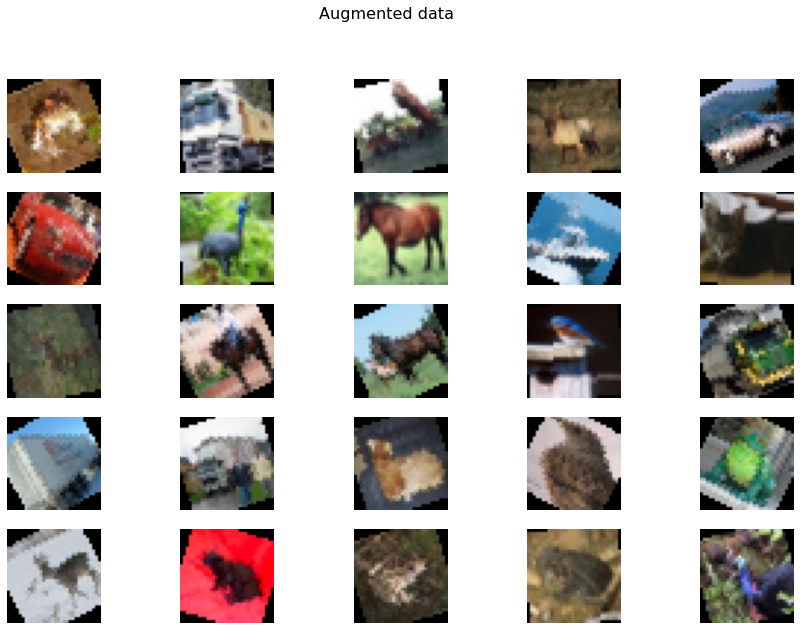

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt



# Image preprocessing modules
# transform = transforms.Compose([
#     transforms.Pad(4),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomCrop(32),
#     transforms.ToTensor()])

# transform = transforms.Compose([
#     transforms.ColorJitter(brightness=0.8),
#     transforms.ToTensor()])

transform = transforms.Compose([
    transforms.RandomAffine(30),
    transforms.ToTensor()])

# transform = transforms.Compose([
#     transforms.RandomPerspective(),
#     transforms.ToTensor()])


# transform = transforms.Compose([
#     transforms.RandomResizedCrop(28),
#     transforms.ToTensor()])

# transform = transforms.Compose([
#     transforms.GaussianBlur(3),
#     transforms.ToTensor()])

# transform = transforms.Compose([
#     transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random'),
#     transforms.ToTensor()])


# Number of imeages to display
B = 25

train_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                 transform=transform,
                                 download=True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=B, shuffle=False)


fig = plt.figure(figsize=(15, 10))
fig.suptitle('Augmented data', fontsize=16)
images, _ = next(iter(train_loader))  # discard label
for k in range(B) :
    ax = fig.add_subplot(B//5, 5, k+1)

    plt.imshow(images[k,:,:,:].squeeze().permute(1, 2, 0))
    plt.axis('off')

plt.show()

Classical LeNet5 on CIFAR10 with data augmentation

Result: 
[Test set] Average loss: 0.0107, Accuracy: 6196/10000 (61.96%)

In [11]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                 train=True, 
                                 transform=transform,
                                 download=True)

test_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                train=False, 
                                transform=transforms.ToTensor())

'''
Step 2
'''
class LeNet(nn.Module) :
    
    def __init__(self) :
        super(LeNet, self).__init__()
        
        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(3, 6, kernel_size=5),
                nn.Tanh()
                )
        self.pool_layer1 = nn.Sequential(
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Tanh()
                )
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(6, 16, kernel_size=5),
                nn.Tanh()
                )
        self.pool_layer2 = nn.Sequential(
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Tanh()
                )
        self.C5_layer = nn.Sequential(
                nn.Linear(5*5*16, 120),
                nn.Tanh()
                )
        self.fc_layer1 = nn.Sequential(
                nn.Linear(120, 84),
                nn.Tanh()
                )
        self.fc_layer2 = nn.Linear(84, 10)
        
        
    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.pool_layer1(output)
        output = self.conv_layer2(output)
        output = self.pool_layer2(output)
        output = output.view(-1,5*5*16)
        output = self.C5_layer(output)
        output = self.fc_layer1(output)
        output = self.fc_layer2(output)
        return output

    
'''
Step 3
'''
model = LeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

'''
Step 4
'''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1024, shuffle=True)

import time
start = time.time()
for epoch in range(10) :
    print("{}th epoch starting.".format(epoch))
    for images, labels in train_loader :
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1024, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    
    total += labels.size(0)
            
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

Files already downloaded and verified


RuntimeError: CUDA error: invalid device ordinal
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

Modern LeNet5 on CIFAR10 with data augmentation

Result:
[Test set] Average loss: 0.0089, Accuracy: 6885/10000 (68.85%)

In [6]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1
'''

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                 train=True, 
                                 transform=transform,
                                 download=True)

test_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                train=False, 
                                transform=transforms.ToTensor())

'''
Step 2
'''
class LeNet(nn.Module) :
    
    def __init__(self) :
        super(LeNet, self).__init__()
        
        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(3, 6, kernel_size=5),
                nn.ReLU()
                )
        self.pool_layer1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(6, 16, kernel_size=5),
                nn.ReLU()
                )
        self.pool_layer2 = nn.MaxPool2d(kernel_size=2, stride=2)  
        self.C5_layer = nn.Sequential(
                nn.Linear(5*5*16, 120),
                nn.ReLU()
                )
        self.fc_layer1 = nn.Sequential(
                nn.Linear(120, 84),
                nn.ReLU()
                )
        self.fc_layer2 = nn.Linear(84, 10)
        
        
    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.pool_layer1(output)
        output = self.conv_layer2(output)
        output = self.pool_layer2(output)
        output = output.view(-1,5*5*16)
        output = self.C5_layer(output)
        output = self.fc_layer1(output)
        output = self.fc_layer2(output)
        return output

    
'''
Step 3
'''
model = LeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

'''
Step 4
'''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

import time
start = time.time()
for epoch in range(200) :
    print("{}th epoch starting.".format(epoch))
    for images, labels in train_loader :
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    
    total += labels.size(0)
            
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

Files already downloaded and verified
0th epoch starting.
1th epoch starting.
2th epoch starting.
3th epoch starting.
4th epoch starting.
5th epoch starting.
6th epoch starting.
7th epoch starting.
8th epoch starting.
9th epoch starting.
10th epoch starting.
11th epoch starting.
12th epoch starting.
13th epoch starting.
14th epoch starting.
15th epoch starting.
16th epoch starting.
17th epoch starting.
18th epoch starting.
19th epoch starting.
20th epoch starting.
21th epoch starting.
22th epoch starting.
23th epoch starting.
24th epoch starting.
25th epoch starting.
26th epoch starting.
27th epoch starting.
28th epoch starting.
29th epoch starting.
30th epoch starting.
31th epoch starting.
32th epoch starting.
33th epoch starting.
34th epoch starting.
35th epoch starting.
36th epoch starting.
37th epoch starting.
38th epoch starting.
39th epoch starting.
40th epoch starting.
41th epoch starting.
42th epoch starting.
43th epoch starting.
44th epoch starting.
45th epoch starting.
46th e

Dropout + modern LeNet5 + data augmentation

Results: [Test set] Average loss: 0.0091, Accuracy: 6817/10000 (68.17%)

In [1]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                 train=True, 
                                 transform=transform,
                                 download=True)

test_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                train=False, 
                                transform=transforms.ToTensor())

'''
Step 2
'''
class LeNet(nn.Module) :

    def __init__(self) :
        super(LeNet, self).__init__()
        p_drop = 0.1
        
        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(3, 6, kernel_size=5),
                nn.ReLU()
                )
        self.pool_layer1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(6, 16, kernel_size=5),
                nn.ReLU()
                )
        self.pool_layer2 = nn.MaxPool2d(kernel_size=2, stride=2)  
        self.C5_layer = nn.Sequential(
                nn.Dropout2d(p=p_drop),
                nn.Linear(5*5*16, 120),
                nn.ReLU()
                )
        self.fc_layer1 = nn.Sequential(
                nn.Dropout2d(p=p_drop),
                nn.Linear(120, 84),
                nn.ReLU()
                )
        self.fc_layer2 = nn.Linear(84, 10)


    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.pool_layer1(output)
        output = self.conv_layer2(output)
        output = self.pool_layer2(output)
        output = output.view(-1,5*5*16)
        output = self.C5_layer(output)
        output = self.fc_layer1(output)
        output = self.fc_layer2(output)
        return output

'''
Step 3
'''
model = LeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

'''
Step 4
'''
model.train()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

import time
start = time.time()
for epoch in range(200) :
    print("{}th epoch starting.".format(epoch))
    for i, (images, labels) in enumerate(train_loader) :
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()

end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
model.eval()
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()

    total += labels.size(0)

print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

Files already downloaded and verified
0th epoch starting.
1th epoch starting.
2th epoch starting.
3th epoch starting.
4th epoch starting.
5th epoch starting.
6th epoch starting.
7th epoch starting.
8th epoch starting.
9th epoch starting.
10th epoch starting.
11th epoch starting.
12th epoch starting.
13th epoch starting.
14th epoch starting.
15th epoch starting.
16th epoch starting.
17th epoch starting.
18th epoch starting.
19th epoch starting.
20th epoch starting.
21th epoch starting.
22th epoch starting.
23th epoch starting.
24th epoch starting.
25th epoch starting.
26th epoch starting.
27th epoch starting.
28th epoch starting.
29th epoch starting.
30th epoch starting.
31th epoch starting.
32th epoch starting.
33th epoch starting.
34th epoch starting.
35th epoch starting.
36th epoch starting.
37th epoch starting.
38th epoch starting.
39th epoch starting.
40th epoch starting.
41th epoch starting.
42th epoch starting.
43th epoch starting.
44th epoch starting.
45th epoch starting.
46th e

Weight decay + modern LeNet5 + data augmentation

Result: [Test set] Average loss: 0.0084, Accuracy: 7041/10000 (70.41%)

In [2]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                 train=True, 
                                 transform=transform,
                                 download=True)

test_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                train=False, 
                                transform=transforms.ToTensor())
    
'''
Step 2
'''
class LeNet(nn.Module) :

    def __init__(self) :
        super(LeNet, self).__init__()

        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(3, 6, kernel_size=5),
                nn.ReLU()
                )
        self.pool_layer1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(6, 16, kernel_size=5),
                nn.ReLU()
                )
        self.pool_layer2 = nn.MaxPool2d(kernel_size=2, stride=2)  
        self.C5_layer = nn.Sequential(
                nn.Linear(5*5*16, 120),
                nn.ReLU()
                )
        self.fc_layer1 = nn.Sequential(
                nn.Linear(120, 84),
                nn.ReLU()
                )
        self.fc_layer2 = nn.Linear(84, 10)


    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.pool_layer1(output)
        output = self.conv_layer2(output)
        output = self.pool_layer2(output)
        output = output.view(-1,5*5*16)
        output = self.C5_layer(output)
        output = self.fc_layer1(output)
        output = self.fc_layer2(output)
        return output

'''
Step 3
'''
model = LeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-05)

'''
Step 4
'''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

import time
start = time.time()
for epoch in range(200) :
    print("{}th epoch starting.".format(epoch))
    for i, (images, labels) in enumerate(train_loader) :
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()

end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()

    total += labels.size(0)

print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

Files already downloaded and verified
0th epoch starting.
1th epoch starting.
2th epoch starting.
3th epoch starting.
4th epoch starting.
5th epoch starting.
6th epoch starting.
7th epoch starting.
8th epoch starting.
9th epoch starting.
10th epoch starting.
11th epoch starting.
12th epoch starting.
13th epoch starting.
14th epoch starting.
15th epoch starting.
16th epoch starting.
17th epoch starting.
18th epoch starting.
19th epoch starting.
20th epoch starting.
21th epoch starting.
22th epoch starting.
23th epoch starting.
24th epoch starting.
25th epoch starting.
26th epoch starting.
27th epoch starting.
28th epoch starting.
29th epoch starting.
30th epoch starting.
31th epoch starting.
32th epoch starting.
33th epoch starting.
34th epoch starting.
35th epoch starting.
36th epoch starting.
37th epoch starting.
38th epoch starting.
39th epoch starting.
40th epoch starting.
41th epoch starting.
42th epoch starting.
43th epoch starting.
44th epoch starting.
45th epoch starting.
46th e

Weight decay + dropout + modern LeNet5 + data augmentation

Results: [Test set] Average loss: 0.0090, Accuracy: 6893/10000 (68.93%)

In [3]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                 train=True, 
                                 transform=transform,
                                 download=True)

test_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                train=False, 
                                transform=transforms.ToTensor())
    


'''
Step 2
'''
class LeNet(nn.Module) :

    def __init__(self) :
        super(LeNet, self).__init__()
        p_drop = 0.1
        
        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(3, 6, kernel_size=5),
                nn.ReLU()
                )
        self.pool_layer1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(6, 16, kernel_size=5),
                nn.ReLU()
                )
        self.pool_layer2 = nn.MaxPool2d(kernel_size=2, stride=2)  
        self.C5_layer = nn.Sequential(
                nn.Dropout2d(p=p_drop),
                nn.Linear(5*5*16, 120),
                nn.ReLU()
                )
        self.fc_layer1 = nn.Sequential(
                nn.Dropout2d(p=p_drop),
                nn.Linear(120, 84),
                nn.ReLU()
                )
        self.fc_layer2 = nn.Linear(84, 10)


    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.pool_layer1(output)
        output = self.conv_layer2(output)
        output = self.pool_layer2(output)
        output = output.view(-1,5*5*16)
        output = self.C5_layer(output)
        output = self.fc_layer1(output)
        output = self.fc_layer2(output)
        return output

'''
Step 3
'''
model = LeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-05)

'''
Step 4
'''
model.train()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

import time
start = time.time()
for epoch in range(200) :
    print("{}th epoch starting.".format(epoch))
    for i, (images, labels) in enumerate(train_loader) :
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()

end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
model.eval()
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()

    total += labels.size(0)

print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

Files already downloaded and verified
0th epoch starting.
1th epoch starting.
2th epoch starting.
3th epoch starting.
4th epoch starting.
5th epoch starting.
6th epoch starting.
7th epoch starting.
8th epoch starting.
9th epoch starting.
10th epoch starting.
11th epoch starting.
12th epoch starting.
13th epoch starting.
14th epoch starting.
15th epoch starting.
16th epoch starting.
17th epoch starting.
18th epoch starting.
19th epoch starting.
20th epoch starting.
21th epoch starting.
22th epoch starting.
23th epoch starting.
24th epoch starting.
25th epoch starting.
26th epoch starting.
27th epoch starting.
28th epoch starting.
29th epoch starting.
30th epoch starting.
31th epoch starting.
32th epoch starting.
33th epoch starting.
34th epoch starting.
35th epoch starting.
36th epoch starting.
37th epoch starting.
38th epoch starting.
39th epoch starting.
40th epoch starting.
41th epoch starting.
42th epoch starting.
43th epoch starting.
44th epoch starting.
45th epoch starting.
46th e

AlexNet CIFAR10

Results: [Test set] Average loss: 0.0046, Accuracy: 8852/10000 (88.52%)

In [4]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                 train=True, 
                                 transform=transform,
                                 download=True)

test_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                train=False, 
                                transform=transforms.ToTensor())
    


'''
Step 2
'''

class AlexNet(nn.Module) :
    
    def __init__(self, num_class=10) :
        super(AlexNet, self).__init__()
        
        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(3, 96, kernel_size=4),
                nn.ReLU(),
                nn.Conv2d(96, 96, kernel_size=3),
                nn.ReLU()
                )
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(96, 256, kernel_size=5, padding=2),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3, stride=2)
                )
        self.conv_layer3 = nn.Sequential(
                nn.Conv2d(256, 384, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.Conv2d(384, 384, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.Conv2d(384, 256, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3, stride=2)
                )
        
        self.fc_layer1 = nn.Sequential(
                nn.Dropout(),
                nn.Linear(9216, 4096),
                nn.ReLU(),
                nn.Dropout(),  #p=0.5 by default
                nn.Linear(4096, 4096),
                nn.ReLU(),     #p=0.5 by default
                nn.Linear(4096, 10)
                )
    
    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.conv_layer2(output)
        output = self.conv_layer3(output)
        output = output.view(-1, 9216)
        output = self.fc_layer1(output)
        return output

    

'''
Step 3
'''
model = AlexNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, weight_decay=0.00005)

'''
Step 4
'''
model.train()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

import time
start = time.time()
for epoch in range(100) :
    print("{}th epoch starting.".format(epoch))
    for i, (images, labels) in enumerate(train_loader) :
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()

    print ("Epoch [{}] Loss: {:.4f}".format(epoch+1, train_loss.item()))

end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
model.eval()
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)
with torch.no_grad():  #using context manager
    for images, labels in test_loader :
        images, labels = images.to(device), labels.to(device)

        output = model(images)
        test_loss += loss_function(output, labels).item()

        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()

        total += labels.size(0)

print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

Files already downloaded and verified
0th epoch starting.
Epoch [1] Loss: 2.2951
1th epoch starting.
Epoch [2] Loss: 2.3031
2th epoch starting.
Epoch [3] Loss: 2.2218
3th epoch starting.
Epoch [4] Loss: 2.2851
4th epoch starting.
Epoch [5] Loss: 2.3342
5th epoch starting.
Epoch [6] Loss: 1.8571
6th epoch starting.
Epoch [7] Loss: 1.5752
7th epoch starting.
Epoch [8] Loss: 1.7041
8th epoch starting.
Epoch [9] Loss: 1.3698
9th epoch starting.
Epoch [10] Loss: 1.3407
10th epoch starting.
Epoch [11] Loss: 1.1056
11th epoch starting.
Epoch [12] Loss: 1.3354
12th epoch starting.
Epoch [13] Loss: 0.9303
13th epoch starting.
Epoch [14] Loss: 0.8565
14th epoch starting.
Epoch [15] Loss: 0.9399
15th epoch starting.
Epoch [16] Loss: 0.8309
16th epoch starting.
Epoch [17] Loss: 0.8297
17th epoch starting.
Epoch [18] Loss: 0.6621
18th epoch starting.
Epoch [19] Loss: 0.7288
19th epoch starting.
Epoch [20] Loss: 0.6225
20th epoch starting.
Epoch [21] Loss: 0.8439
21th epoch starting.
Epoch [22] Loss

VGG13 for CIFAR10

Results: [Test set] Average loss: 0.0041, Accuracy: 8624/10000 (86.24%)

[Test set] Average loss: 0.0041, Accuracy: 8735/10000 (87.35%)

In [1]:
import torch
import torch.nn as nn
import math
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./cifar_data/',
                                 train=True, 
                                 transform=transform,
                                 download=True)

test_dataset = datasets.CIFAR10(root='./cifar_data/',
                                train=False, 
                                transform=transforms.ToTensor())
    
'''
Step 2
'''

class VGG13(nn.Module) :
    def __init__(self) :
        super(VGG13, self).__init__()
        
        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(3, 64, kernel_size=3, padding=1),     # 64 * 32 * 32
                nn.ReLU(),
                nn.Conv2d(64, 64, kernel_size=3, padding=1),    # 64 * 32 * 32
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2)           # 64 * 16 * 16
                )
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(64, 128, kernel_size=3, padding=1),   # 128 * 16 * 16
                nn.ReLU(),
                nn.Conv2d(128, 128, kernel_size=3, padding=1),  # 128 * 16 * 16
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2)           # 128 * 8 * 8
                )
        self.conv_layer3 = nn.Sequential(
                nn.Conv2d(128, 256, kernel_size=3, padding=1),  # 256 * 8 * 8
                nn.ReLU(),
                nn.Conv2d(256, 256, kernel_size=3, padding=1),  # 256 * 8 * 8
                nn.ReLU(),
                nn.Conv2d(256, 256, kernel_size=3, padding=1),  # 256 * 8 * 8
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2)           # 256 * 4 * 4
                )
        self.conv_layer4 = nn.Sequential(
                nn.Conv2d(256, 512, kernel_size=3, padding=1),  # 512 * 4 * 4
                nn.ReLU(),
                nn.Conv2d(512, 512, kernel_size=3, padding=1),  # 512 * 4 * 4
                nn.ReLU(),
                nn.Conv2d(512, 512, kernel_size=3, padding=1),  # 512 * 4 * 4
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),          # 512 * 2 * 2
                )
        self.fc_layer1 = nn.Sequential(
                nn.Linear(512*2*2, 4096),                           # 1 * 4096
                nn.ReLU(),
                nn.Dropout()
                )
        self.fc_layer2 = nn.Sequential(
                nn.Linear(4096, 4096),                          # 1 * 4096
                nn.ReLU(),
                nn.Dropout()
                )
        self.fc_layer3 = nn.Sequential(
                nn.Linear(4096, 10),                     # 1 * num_class
                )

        
    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.conv_layer2(output)
        output = self.conv_layer3(output)
        output = self.conv_layer4(output)
        output = output.view(-1, 512*2*2)
        output = self.fc_layer1(output)
        output = self.fc_layer2(output)
        output = self.fc_layer3(output)
        return output


'''
Step 3   
'''
model = VGG13().to(device)

def weights_init(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal(m.weight.data)
        m.bias.data.zero_()
model.apply(weights_init)

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9, weight_decay=5e-4)

'''
Step 4
'''
model.train()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

import time
start = time.time()
for epoch in range(200) :
    print("{}th epoch starting.".format(epoch))
    for i, (images, labels) in enumerate(train_loader) :
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()

    print ("Epoch [{}] Loss: {:.4f}".format(epoch+1, train_loss.item()))

end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
model.eval()
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)
with torch.no_grad():
    for images, labels in test_loader :
        images, labels = images.to(device), labels.to(device)

        output = model(images)
        test_loss += loss_function(output, labels).item()

        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()

        total += labels.size(0)

print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

Files already downloaded and verified


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:106: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


0th epoch starting.
Epoch [1] Loss: 1.8598
1th epoch starting.
Epoch [2] Loss: 1.3329
2th epoch starting.
Epoch [3] Loss: 1.4340
3th epoch starting.
Epoch [4] Loss: 1.2230
4th epoch starting.
Epoch [5] Loss: 0.9261
5th epoch starting.
Epoch [6] Loss: 1.1918
6th epoch starting.
Epoch [7] Loss: 1.1174
7th epoch starting.
Epoch [8] Loss: 0.4981
8th epoch starting.
Epoch [9] Loss: 0.7398
9th epoch starting.
Epoch [10] Loss: 0.6721
10th epoch starting.
Epoch [11] Loss: 0.6295
11th epoch starting.
Epoch [12] Loss: 0.7846
12th epoch starting.
Epoch [13] Loss: 0.6886
13th epoch starting.
Epoch [14] Loss: 0.5504
14th epoch starting.
Epoch [15] Loss: 0.4254
15th epoch starting.
Epoch [16] Loss: 0.5293
16th epoch starting.
Epoch [17] Loss: 0.3851
17th epoch starting.
Epoch [18] Loss: 0.3241
18th epoch starting.
Epoch [19] Loss: 0.4922
19th epoch starting.
Epoch [20] Loss: 0.2641
20th epoch starting.
Epoch [21] Loss: 0.3612
21th epoch starting.
Epoch [22] Loss: 0.3590
22th epoch starting.
Epoch [2

Epoch [180] Loss: 0.2044
180th epoch starting.
Epoch [181] Loss: 0.4036
181th epoch starting.
Epoch [182] Loss: 0.2581
182th epoch starting.
Epoch [183] Loss: 0.5247
183th epoch starting.
Epoch [184] Loss: 0.0624
184th epoch starting.
Epoch [185] Loss: 0.3808
185th epoch starting.
Epoch [186] Loss: 0.2784
186th epoch starting.
Epoch [187] Loss: 0.2670
187th epoch starting.
Epoch [188] Loss: 0.2350
188th epoch starting.
Epoch [189] Loss: 0.3496
189th epoch starting.
Epoch [190] Loss: 0.1417
190th epoch starting.
Epoch [191] Loss: 0.4387
191th epoch starting.
Epoch [192] Loss: 0.1899
192th epoch starting.
Epoch [193] Loss: 0.3697
193th epoch starting.
Epoch [194] Loss: 0.2307
194th epoch starting.
Epoch [195] Loss: 0.4426
195th epoch starting.
Epoch [196] Loss: 0.2842
196th epoch starting.
Epoch [197] Loss: 0.2145
197th epoch starting.
Epoch [198] Loss: 0.2953
198th epoch starting.
Epoch [199] Loss: 0.2466
199th epoch starting.
Epoch [200] Loss: 0.1592
Time ellapsed in training is: 2501.

# Autodiff example

In [6]:
import torch

x = torch.tensor(3.3, requires_grad=True)
y = torch.tensor(1.1, requires_grad=True)
z = torch.tensor(2.3, requires_grad=True)

fn = torch.sin(torch.cosh(y*y+x/z)+torch.tanh(x*y*z))/torch.log(1+torch.exp(x))
fn.backward()

print(x)
print(y)
print(z)
print(fn.item())
print(x.grad)
print(y.grad)
print(z.grad)

tensor(3.3000, requires_grad=True)
tensor(1.1000, requires_grad=True)
tensor(2.3000, requires_grad=True)
0.2924030125141144
tensor(-0.2853)
tensor(-1.0158)
tensor(0.2880)


NiN Network for CIFAR10

Results: [Test set] Average loss: 0.0045, Accuracy: 8484/10000 (84.84%)

In [2]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                 train=True, 
                                 transform=transform,
                                 download=True)

test_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                train=False, 
                                transform=transforms.ToTensor())
    
'''
Step 2
'''
class NiN(nn.Module) :
    def __init__(self) :
        super(NiN, self).__init__()
        
        self.mlpconv_layer1 = nn.Sequential(
                nn.Conv2d(3, 192, kernel_size=5, padding=2),    # 192 * 32 * 32
                nn.ReLU(),
                nn.Conv2d(192, 160, kernel_size=1),             # 160 * 32 * 32
                nn.ReLU(),
                nn.Conv2d(160, 96, kernel_size=1),              # 96 * 32 * 32
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3, stride=2, padding=1),# 96 * 16 * 16
                nn.Dropout()
                )
        self.mlpconv_layer2 = nn.Sequential(
                nn.Conv2d(96, 192, kernel_size=5, padding=2),   # 192 * 16 * 16
                nn.ReLU(),
                nn.Conv2d(192, 192, kernel_size=1),             # 192 * 16 * 16
                nn.ReLU(),
                nn.Conv2d(192, 192, kernel_size=1),             # 192 * 16 * 16
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3, stride=2, padding=1),# 192 * 8 * 8
                nn.Dropout()
                )
        self.mlpconv_layer3 = nn.Sequential(
                nn.Conv2d(192, 192, kernel_size=3, padding=1),  # 192 * 8 * 8
                nn.ReLU(),
                nn.Conv2d(192, 192, kernel_size=1),             # 192 * 8 * 8
                nn.ReLU(),
                nn.Conv2d(192, 10, kernel_size=1),              # 10 * 8 * 8
                nn.ReLU(),
                nn.AvgPool2d(kernel_size=8)                     # 10 * 1 * 1
                )
        
    
    def forward(self, x) :
        output = self.mlpconv_layer1(x)
        output = self.mlpconv_layer2(output)
        output = self.mlpconv_layer3(output)
        output = output.view(-1, 10)
        return output


'''
Step 3
'''
model = NiN().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003, weight_decay=0.00001)


'''
Step 4
'''
model.train()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

import time
start = time.time()
for epoch in range(100) :
    print("{}th epoch starting.".format(epoch))
    for i, (images, labels) in enumerate(train_loader) :
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()

    print ("Epoch [{}] Loss: {:.4f}".format(epoch+1, train_loss.item()))

end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
model.eval()
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)
with torch.no_grad():
    for images, labels in test_loader :
        images, labels = images.to(device), labels.to(device)

        output = model(images)
        test_loss += loss_function(output, labels).item()

        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()

        total += labels.size(0)

print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

Files already downloaded and verified
0th epoch starting.
Epoch [1] Loss: 1.8504
1th epoch starting.
Epoch [2] Loss: 1.6397
2th epoch starting.
Epoch [3] Loss: 1.4323
3th epoch starting.
Epoch [4] Loss: 1.5498
4th epoch starting.
Epoch [5] Loss: 1.3615
5th epoch starting.
Epoch [6] Loss: 1.2900
6th epoch starting.
Epoch [7] Loss: 1.4954
7th epoch starting.
Epoch [8] Loss: 1.2542
8th epoch starting.
Epoch [9] Loss: 1.1560
9th epoch starting.
Epoch [10] Loss: 1.1334
10th epoch starting.
Epoch [11] Loss: 1.1016
11th epoch starting.
Epoch [12] Loss: 1.4655
12th epoch starting.
Epoch [13] Loss: 0.9612
13th epoch starting.
Epoch [14] Loss: 0.8573
14th epoch starting.
Epoch [15] Loss: 1.0215
15th epoch starting.
Epoch [16] Loss: 0.9366
16th epoch starting.
Epoch [17] Loss: 1.0479
17th epoch starting.
Epoch [18] Loss: 0.9181
18th epoch starting.
Epoch [19] Loss: 1.0598
19th epoch starting.
Epoch [20] Loss: 1.0103
20th epoch starting.
Epoch [21] Loss: 0.8864
21th epoch starting.
Epoch [22] Loss

GoogLeNet for CIFAR10

Results: [Test set] Average loss: 0.0045, Accuracy: 8728/10000 (87.28%)


In [2]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                 train=True, 
                                 transform=transform,
                                 download=True)

test_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                train=False, 
                                transform=transforms.ToTensor())
    
'''
Step 2:
'''
class GoogLeNet(nn.Module):

    def __init__(self):
        super(GoogLeNet, self).__init__()        

        self.conv1 = BasicConv2d(3, 64, kernel_size=7, padding=3)
        self.conv2 = BasicConv2d(64, 64, kernel_size=1)
        self.conv3 = BasicConv2d(64, 192, kernel_size=5)

        self.inception3a = Inception(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception4a = Inception(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = Inception(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = Inception(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = Inception(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = Inception(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)

        self.inception5a = Inception(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception(832, 384, 192, 384, 48, 128, 128)


        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(1024, 10)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)

    def forward(self, x):
        # N x 3 x 32 x 32
        x = self.conv1(x)
        # N x 64 x 32 x 32
        x = self.conv2(x)
        # N x 64 x 32 x 32
        x = self.conv3(x)
        # N x 192 x 28 x 28

        # N x 192 x 28 x 28
        x = self.inception3a(x)
        # N x 256 x 28 x 28
        x = self.inception3b(x)
        # N x 480 x 28 x 28
        x = self.maxpool3(x)
        # N x 480 x 14 x 14
        x = self.inception4a(x)
        # N x 512 x 14 x 14
        x = self.inception4b(x)
        # N x 512 x 14 x 14
        x = self.inception4c(x)
        # N x 512 x 14 x 14
        x = self.inception4d(x)
        # N x 528 x 14 x 14
        x = self.inception4e(x)
        # N x 832 x 14 x 14
        x = self.maxpool4(x)
        # N x 832 x 7 x 7
        x = self.inception5a(x)
        # N x 832 x 7 x 7
        x = self.inception5b(x)
        # N x 1024 x 7 x 7
        x = self.avgpool(x)
        # N x 1024 x 1 x 1
        x = torch.flatten(x, 1)
        # N x 1024
        x = self.dropout(x)
        x = self.fc(x)
        # N x 10 (num_classes)
        return x

class Inception(nn.Module):

    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):
        super(Inception, self).__init__()
        
        self.branch1 = BasicConv2d(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            BasicConv2d(in_channels, ch3x3red, kernel_size=1),
            BasicConv2d(ch3x3red, ch3x3, kernel_size=3, padding=1)
        )

        self.branch3 = nn.Sequential(
            BasicConv2d(in_channels, ch5x5red, kernel_size=1),
            BasicConv2d(ch5x5red, ch5x5, kernel_size=5, padding=2)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            BasicConv2d(in_channels, pool_proj, kernel_size=1)
        )

    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)

        return torch.cat([branch1, branch2, branch3, branch4], 1)


class BasicConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, **kwargs):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Sequential(
                            nn.Conv2d(in_channels, out_channels, **kwargs),
                            nn.ReLU()
                            )
    def forward(self, x):
        return self.conv(x)
    


'''
Step 3
'''
model = GoogLeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=5e-4)

'''
Step 4
'''
model.train()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

import time
start = time.time()
for epoch in range(100) :
    print("{}th epoch starting.".format(epoch))
    for i, (images, labels) in enumerate(train_loader) :
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()

    print ("Epoch [{}] Loss: {:.4f}".format(epoch+1, train_loss.item()))

end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
model.eval()
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)
with torch.no_grad():  #using context manager
    for images, labels in test_loader :
        images, labels = images.to(device), labels.to(device)

        output = model(images)
        test_loss += loss_function(output, labels).item()

        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()

        total += labels.size(0)

print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

Files already downloaded and verified
0th epoch starting.
Epoch [1] Loss: 2.2639
1th epoch starting.
Epoch [2] Loss: 1.9377
2th epoch starting.
Epoch [3] Loss: 1.8957
3th epoch starting.
Epoch [4] Loss: 1.8470
4th epoch starting.
Epoch [5] Loss: 1.9300
5th epoch starting.
Epoch [6] Loss: 1.6088
6th epoch starting.
Epoch [7] Loss: 1.7900
7th epoch starting.
Epoch [8] Loss: 1.5765
8th epoch starting.
Epoch [9] Loss: 1.6309
9th epoch starting.
Epoch [10] Loss: 1.3813
10th epoch starting.
Epoch [11] Loss: 1.2910
11th epoch starting.
Epoch [12] Loss: 1.4910
12th epoch starting.
Epoch [13] Loss: 1.2687
13th epoch starting.
Epoch [14] Loss: 1.1695
14th epoch starting.
Epoch [15] Loss: 1.4188
15th epoch starting.
Epoch [16] Loss: 1.2343
16th epoch starting.
Epoch [17] Loss: 1.3205
17th epoch starting.
Epoch [18] Loss: 1.4026
18th epoch starting.
Epoch [19] Loss: 0.9462
19th epoch starting.
Epoch [20] Loss: 0.8126
20th epoch starting.
Epoch [21] Loss: 0.9225
21th epoch starting.
Epoch [22] Loss

GoogLeNet with BatchNorm CIFAR10


Results: [Test set] Average loss: 0.0072, Accuracy: 8222/10000 (82.22%)

In [1]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                 train=True, 
                                 transform=transform,
                                 download=True)

test_dataset = datasets.CIFAR10(root='./cifar_10data/',
                                train=False, 
                                transform=transforms.ToTensor())
    
'''
Step 2:
'''
class GoogLeNet(nn.Module):

    def __init__(self):
        super(GoogLeNet, self).__init__()        

        self.conv1 = BasicConv2d(3, 64, kernel_size=7, padding=3)
        self.conv2 = BasicConv2d(64, 64, kernel_size=1)
        self.conv3 = BasicConv2d(64, 192, kernel_size=5)

        self.inception3a = Inception(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception4a = Inception(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = Inception(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = Inception(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = Inception(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = Inception(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)

        self.inception5a = Inception(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception(832, 384, 192, 384, 48, 128, 128)


        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(1024, 10)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)

        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)

        x = self.inception4a(x)
        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        x = self.inception4e(x)
        x = self.maxpool4(x)

        x = self.inception5a(x)
        x = self.inception5b(x)
        x = self.avgpool(x)
        
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

class Inception(nn.Module):

    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):
        super(Inception, self).__init__()
        
        self.branch1 = BasicConv2d(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            BasicConv2d(in_channels, ch3x3red, kernel_size=1),
            BasicConv2d(ch3x3red, ch3x3, kernel_size=3, padding=1)
        )

        self.branch3 = nn.Sequential(
            BasicConv2d(in_channels, ch5x5red, kernel_size=1),
            BasicConv2d(ch5x5red, ch5x5, kernel_size=5, padding=2)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            BasicConv2d(in_channels, pool_proj, kernel_size=1)
        )

    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)

        return torch.cat([branch1, branch2, branch3, branch4], 1)


class BasicConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, **kwargs):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Sequential(
                            nn.Conv2d(in_channels, out_channels, **kwargs),
                            nn.BatchNorm2d(out_channels),   #Batch norm here
                            nn.ReLU()
                            )
    def forward(self, x):
        return self.conv(x)
    


'''
Step 3
'''
model = GoogLeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=5e-4)

'''
Step 4
'''
model.train()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

import time
start = time.time()
for epoch in range(100) :
    print("{}th epoch starting.".format(epoch))
    for i, (images, labels) in enumerate(train_loader) :
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()

    print ("Epoch [{}] Loss: {:.4f}".format(epoch+1, train_loss.item()))

end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
model.eval()
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)
with torch.no_grad():  #using context manager
    for images, labels in test_loader :
        images, labels = images.to(device), labels.to(device)

        output = model(images)
        test_loss += loss_function(output, labels).item()

        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()

        total += labels.size(0)

print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

Files already downloaded and verified
0th epoch starting.
Epoch [1] Loss: 1.3556
1th epoch starting.
Epoch [2] Loss: 1.0016
2th epoch starting.
Epoch [3] Loss: 0.8536
3th epoch starting.
Epoch [4] Loss: 0.6516
4th epoch starting.
Epoch [5] Loss: 0.4868
5th epoch starting.
Epoch [6] Loss: 0.3415
6th epoch starting.
Epoch [7] Loss: 0.3197
7th epoch starting.
Epoch [8] Loss: 0.3560
8th epoch starting.
Epoch [9] Loss: 0.3828
9th epoch starting.
Epoch [10] Loss: 0.4011
10th epoch starting.
Epoch [11] Loss: 0.3260
11th epoch starting.
Epoch [12] Loss: 0.2618
12th epoch starting.
Epoch [13] Loss: 0.2623
13th epoch starting.
Epoch [14] Loss: 0.2755
14th epoch starting.
Epoch [15] Loss: 0.3459
15th epoch starting.
Epoch [16] Loss: 0.2778
16th epoch starting.
Epoch [17] Loss: 0.2131
17th epoch starting.
Epoch [18] Loss: 0.3055
18th epoch starting.
Epoch [19] Loss: 0.1537
19th epoch starting.
Epoch [20] Loss: 0.0999
20th epoch starting.
Epoch [21] Loss: 0.2503
21th epoch starting.
Epoch [22] Loss

# ResNet

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels)
        )

        self.downsample = None
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)

        residual = x
        if self.downsample is not None:
            residual = self.downsample(residual)

        return F.relu(out + residual)


class ResNet(nn.Module):
    def __init__(self, num_blocks, num_classes=10):
        super(ResNet, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(16)
        )

        self.layer2 = [ResBlock(16, 16)]
        for i in range(num_blocks[0] - 1):
            self.layer2.append(ResBlock(16, 16))
        self.layer2 = nn.ModuleList(self.layer2)

        self.layer3 = [ResBlock(16, 32, 2)]
        for i in range(num_blocks[1] - 1):
            self.layer3.append(ResBlock(32, 32))
        self.layer3 = nn.ModuleList(self.layer3)

        self.layer4 = [ResBlock(32, 64, 2)]
        for i in range(num_blocks[2] - 1):
            self.layer4.append(ResBlock(64, 64))
        self.layer4 = nn.ModuleList(self.layer4)

        self.avgpool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)

        for i in range(len(self.layer2)):
            out = self.layer2[i](out)

        for i in range(len(self.layer3)):
            out = self.layer3[i](out)

        for i in range(len(self.layer4)):
            out = self.layer4[i](out)

        out = self.avgpool(out)
        out = nn.Flatten()(out)
        out = self.fc(out)

        return out


def resnet20():
    return ResNet([3, 3, 3])


def resnet32():
    return ResNet([5, 5, 5])


def resnet44():
    return ResNet([7, 7, 7])


def resnet56():
    return ResNet([9, 9, 9])



import torch
from torchvision.datasets import CIFAR10, CIFAR100
import torchvision.transforms as T
from torch.utils.data import DataLoader
import time
# from resnet import resnet56


train_transform = T.Compose([
    T.RandomCrop(size=32, padding=4),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

val_transform = T.Compose([
    T.ToTensor(),
    T.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

try:
    train_ds = CIFAR10(root='./', train=True, transform=train_transform,
                        download=False)
except:
    train_ds = CIFAR10(root='./', train=True, transform=train_transform,
                        download=True)

train_dl = DataLoader(train_ds, batch_size=128, shuffle=True)

try:
    val_ds = CIFAR10(root='./', train=False, transform=val_transform,
                        download=False)
except:
    val_ds = CIFAR10(root='./', train=False, transform=val_transform,
                        download=True)

val_dl = DataLoader(val_ds, batch_size=128)

print(f"Total {len(train_ds)} Training Data")
print(f"Total {len(val_ds)} Validation Data")



model = resnet56()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)

lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)

criterion = torch.nn.CrossEntropyLoss()

epochs = 150

best_acc = 0.
total_time = 0

for epoch in range(epochs):
    tick = time.time()
    model.train()
    epoch_loss = 0.
    if epoch == 99 or epoch == 124:
        lr_scheduler.step()
    for data in train_dl:
        optimizer.zero_grad()
        img, label = data[0].to(device), data[1].to(device)

        pred = model(img)

        loss = criterion(pred, label)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"\nEpoch {epoch + 1:4d} Train Loss: {epoch_loss:.6f}")

    model.eval()
    correct = 0.
    with torch.no_grad():
        for data in val_dl:
            img, label = data[0].to(device), data[1].to(device)

            pred = model(img)
            pred = torch.argmax(pred.data, 1)
            correct += (pred == label).sum().item()

        print(f"Epoch {epoch + 1:4d} Validation Accuracy: {100 * correct / len(val_ds)}%")

    if best_acc < correct:
        print(f"New Best Accuracy")
        best_acc = correct
        torch.save({
            'model_state_dict': model.state_dict()
        }, 'model.pt')
    tock = time.time()
    total_time += tock - tick
    print(f"Total Time for Epoch {epoch + 1:4d}: {tock - tick:.6f}")

print(f"Total Time: {total_time:.6f}")








# ResNext

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F


# Building Block for ResNeXt (type (a))
class AggregatedBlock(nn.Module):
    cardinality = 8

    def __init__(self, in_channels, out_channels, stride=1):
        super(AggregatedBlock, self).__init__()

        assert out_channels % self.cardinality == 0
        mid_channels = out_channels // self.cardinality

        self.layer = []
        for _ in range(self.cardinality):
            self.layer.append(nn.Sequential(
                nn.Conv2d(in_channels, mid_channels, kernel_size=1, stride=1, bias=False),
                nn.BatchNorm2d(mid_channels),
                nn.ReLU(),
                nn.Conv2d(mid_channels, mid_channels, kernel_size=3, stride=stride, padding=1, bias=False),
                nn.BatchNorm2d(mid_channels),
                nn.ReLU(),
                nn.Conv2d(mid_channels, out_channels, kernel_size=1, stride=1, bias=False),
                nn.BatchNorm2d(out_channels)
            ))
        self.layer = nn.ModuleList(self.layer)

        if in_channels != out_channels or stride != 1:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.downsample = None

    def forward(self, x):
        out = sum([b(x) for b in self.layer])

        residual = x
        if self.downsample is not None:
            residual = self.downsample(residual)

        return F.relu(out + residual)


# Building Block for ResNeXt (type (b))
class InceptionBlock(nn.Module):
    cardinality = 8

    def __init__(self, in_channels, out_channels, stride=1):
        super(InceptionBlock, self).__init__()

        assert out_channels % self.cardinality == 0
        mid_channels = out_channels // self.cardinality

        self.layer = []
        for i in range(self.cardinality):
            self.layer.append(nn.Sequential(
                nn.Conv2d(in_channels, mid_channels, kernel_size=1, stride=1, bias=False),
                nn.BatchNorm2d(mid_channels),
                nn.ReLU(),
                nn.Conv2d(mid_channels, mid_channels, kernel_size=3, stride=stride, padding=1, bias=False),
                nn.BatchNorm2d(mid_channels),
                nn.ReLU()
            ))
        self.layer = nn.ModuleList(self.layer)

        self.tail = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels)
        )

        if in_channels != out_channels or stride != 1:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.downsample = None

    def forward(self, x):
        out = [b(x) for b in self.layer]
        out = torch.cat(out, dim=1)
        out = self.tail(out)

        residual = x
        if self.downsample is not None:
            residual = self.downsample(residual)

        return F.relu(out + residual)


# Building Block for ResNeXt (type (c))
class GroupConvBlock(nn.Module):
    cardinality = 8

    def __init__(self, in_channels, out_channels, stride=1):
        super(GroupConvBlock, self).__init__()

        assert out_channels % self.cardinality == 0

        self.layer = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, groups=self.cardinality,
                      padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels)
        )

        if in_channels != out_channels or stride != 1:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.downsample = None

    def forward(self, x):
        out = self.layer(x)

        residual = x
        if self.downsample is not None:
            residual = self.downsample(residual)

        return F.relu(out + residual)


# This is an illustration of how groupconv can be implemented
class GroupConvLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, groups=1, bias=False):
        super(GroupConvLayer, self).__init__()

        assert in_channels % groups == 0 and out_channels % groups == 0

        self.groups = groups
        self.layer = []
        self.width = in_channels // groups
        for i in range(groups):
            self.layer.append(nn.Conv2d(
                in_channels=in_channels // groups,
                out_channels=out_channels // groups,
                kernel_size=kernel_size,
                stride=stride,
                bias=bias
            ))
        self.layer = nn.ModuleList(self.layer)

    def forward(self, x):
        w = self.width
        out = [layer(x[:, i * w: (i + 1) * w]) for i, layer in enumerate(self.layers)]

        return torch.cat(out, dim=1)


class ResNeXt(nn.Module):
    cardinality = 32

    def __init__(self, topology_type, num_blocks, num_classes=100):
        assert topology_type in ['a', 'b', 'c']

        super(ResNeXt, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(16)
        )

        self.topology_type = topology_type

        if topology_type == 'a':
            block_type = AggregatedBlock
        elif topology_type == 'b':
            block_type = InceptionBlock
        elif topology_type == 'c':
            block_type = GroupConvBlock

        self.layer2 = [block_type(16, 16) for _ in range(num_blocks[0])]
        self.layer2 = nn.ModuleList(self.layer2)

        self.layer3 = [block_type(16, 32, 2)]
        self.layer3 += [block_type(32, 32) for _ in range(num_blocks[1] - 1)]
        self.layer3 = nn.ModuleList(self.layer3)

        self.layer4 = [block_type(32, 64, 2)]
        self.layer4 += [block_type(64, 64) for _ in range(num_blocks[2] - 1)]
        self.layer4 = nn.ModuleList(self.layer4)

        self.avgpool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)

        for layer in self.layer2:
            out = layer(out)

        for layer in self.layer3:
            out = layer(out)

        for layer in self.layer4:
            out = layer(out)

        out = self.avgpool(out)
        out = torch.squeeze(out)
        out = self.fc(out)

        return out

# SENet

In [ ]:

import torch.nn as nn
import torch.nn.functional as F


class SEModule(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEModule, self).__init__()
        self.globalAvgPool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction),
            nn.ReLU(),
            nn.Linear(channels // reduction, channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = torch.squeeze(self.globalAvgPool(x))
        out = self.fc(out).view(x.size()[0], x.size()[1], 1, 1)

        # both methods works
        # return x * out
        # return x * out.expand_as(x)


class SEBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, reduction=16):
        super(SEBlock, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )

        self.se = SEModule(out_channels, reduction=reduction)

        self.downsample = None
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.se(out)

        residual = x
        if self.downsample is not None:
            residual = self.downsample(residual)

        out += residual

        return F.relu(out)


class SENet(nn.Module):
    def __init__(self, num_blocks, num_classes=10):
        super(SENet, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )

        self.layer2 = [SEBlock(16, 16) for _ in range(num_blocks[0])]
        self.layer2 = nn.ModuleList(self.layer2)

        self.layer3 = [SEBlock(16, 32, 2)]
        self.layer3 += [SEBlock(32, 32) for _ in range(num_blocks[1] - 1)]
        self.layer3 = nn.ModuleList(self.layer3)

        self.layer4 = [SEBlock(32, 64, 2)]
        self.layer4 += [SEBlock(64, 64) for _ in range(num_blocks[2] - 1)]
        self.layer4 = nn.ModuleList(self.layer4)

        self.globalAvgPool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        out = self.layer1(x)

        for layer in self.layer2:
            out = layer(out)

        for layer in self.layer3:
            out = layer(out)

        for layer in self.layer4:
            out = layer(out)

        out = self.globalAvgPool(out)
        out = torch.squeeze(out)
        out = self.fc(out)

        return out